## Урок 3. Домашнее задание

### 3.1 Задание среднего уровня.

В домашней работе предлагается применить PCA трехмерным данным по оттоку, которые содержатся в файле `data/client_segmentation.csv`. В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff

Все показатели вычисляются по формуле

$$
\frac{\text{new_value}-\text{old_value}}{\text{old_value}}
$$

В последней колонке customes_class содержится метка по оттоку:
* $0$ - активный пользователя
* $1$ - "спящий" пользователь (редко пользуется услугами)
* $2$ - пользователь, который ушел в отток

Получается у нас три фичи (датасет трёхмерный) и задача классификации на три класса.

загружаем датасет в память

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
df_source = pd.read_csv('client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head()

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0


**В рамках домашнего задания**

1. Визуализируйте первый и третий столбец из набора данных `call_diff` и`traffic_diff` в виде scatter
2. Постройте PCA  сожмите их до одномерного случая, визуализируйте результат


In [2]:
# -- ВАШ КОД ТУТ --

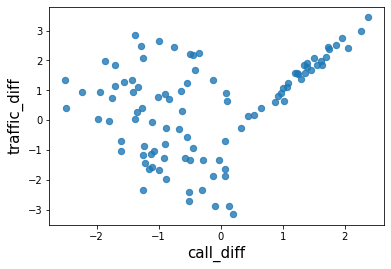

In [3]:
plt.scatter(X[:, 0], X[:, 2], s=40, marker='o', alpha=0.8)
plt.xlabel('call_diff', fontsize=15)
plt.ylabel('traffic_diff', fontsize=15)
plt.show()

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X) # одномерный массив
X_new = pca.inverse_transform(X_pca) # сжатый двумерный массив
X_pca[:10, :]

array([[-0.75744517],
       [-2.61154618],
       [ 0.13301346],
       [ 1.74983161],
       [-2.69734129],
       [ 0.70860533],
       [ 1.27113452],
       [-2.16755366],
       [-2.58986361],
       [ 1.6981062 ]])

In [5]:
X_new[:10, :]

array([[-0.54058147,  0.06297849, -0.13781782],
       [-1.34411913, -0.72531176, -1.61111898],
       [-0.15467097,  0.44156619,  0.5697562 ],
       [ 0.5460321 ,  1.12897317,  1.85450824],
       [-1.38130135, -0.76178843, -1.67929327],
       [ 0.09478132,  0.68628504,  1.02713159],
       [ 0.33857245,  0.92545015,  1.47412714],
       [-1.15169989, -0.53654374, -1.25831474],
       [-1.33472225, -0.71609318, -1.59388962],
       [ 0.52361513,  1.10698158,  1.81340632]])

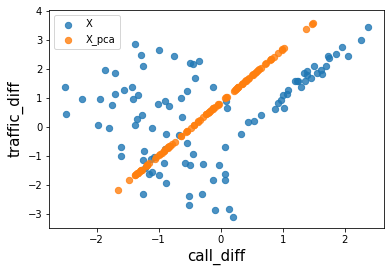

In [6]:
plt.scatter(X[:, 0], X[:, 2], s=40, marker='o', alpha=0.8, label ='X')
plt.scatter(X_new[:, 0], X_new[:, 2], s=40, marker='o', alpha=0.8, label ='X_pca')
plt.xlabel('call_diff', fontsize=15)
plt.ylabel('traffic_diff', fontsize=15)
plt.legend()
plt.show()

### 3.2 Задание высокого уровня

Сжимать двумерные данные не очень интересно, давайте попробуем применить PCA к трёхмерному датасету и сжать данные до размерности $n=2$.

Для наглядности и визуализируем наши трёхмерные данные в 3D:

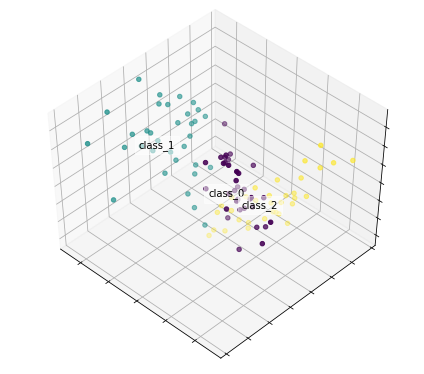

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
# и визуализируем их
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

С помощью класса `sklearn.decomposition.PCA` выполните понижение размерности признакового пространства  с $n=3$ до $n=2$ и снова визуализируйте данные. Картинка должна получится примерно такая:
![classification_dim_reduction](https://248006.selcdn.ru/public/DS.%20Block%202.%20M8/classification_dim_reduction.png)

In [8]:
# -- ВАШ КОД ТУТ --

In [9]:
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X) # одномерный массив
X_new = pca.inverse_transform(X_pca) # сжатый двумерный массив
X_pca[:10, :]

array([[-0.75744517, -0.16623077],
       [-2.61154618, -0.5951692 ],
       [ 0.13301346,  0.37383597],
       [ 1.74983161, -0.27582433],
       [-2.69734129,  0.31624463],
       [ 0.70860533,  0.51547171],
       [ 1.27113452, -0.04822069],
       [-2.16755366, -0.04137214],
       [-2.58986361, -0.08695463],
       [ 1.6981062 ,  1.16822327]])

In [10]:
X_new[:10, :]

array([[-0.42971989,  0.13640782, -0.23757006],
       [-0.9471926 , -0.46240688, -1.96826983],
       [-0.40398733,  0.27643113,  0.79408877],
       [ 0.72998314,  1.25081342,  1.68899078],
       [-1.59220925, -0.90148359, -1.48952028],
       [-0.24899386,  0.45858504,  1.33645734],
       [ 0.37073149,  0.94675074,  1.44519073],
       [-1.12410823, -0.51826836, -1.28314145],
       [-1.27673101, -0.6776826 , -1.64606961],
       [-0.25548904,  0.59094076,  2.51443711]])

In [11]:
Labels = df_source.customes_class.unique()
Labels

array([0., 2., 1.])

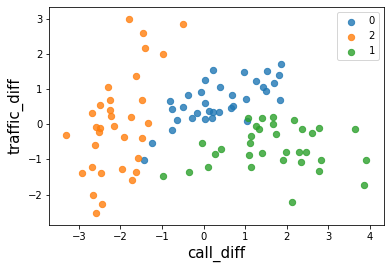

In [12]:
for n in Labels:
    plt.scatter(X_pca[(df_source.customes_class.values == n), 0], X_pca[(df_source.customes_class.values == n), 1],
                s=40, marker='o', alpha=0.8, label = str(n)[0])
plt.xlabel('call_diff', fontsize=15)
plt.ylabel('traffic_diff', fontsize=15)
plt.legend()
plt.show()

В этом уроке мы научились применять алгоритм PCA  понизили размерность датасета с $n=2$ до $n=1$.

В следующем уроке мы реализуем алгоритм PCA на языке python по шагам.